# Image classification MINST Hand written Digit classification dataset

In [1]:
# Importing necessary libraries
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading MNIST dataset
(ds_train, ds_test), ds_info = tfds.load(
    'mnist',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)

In [3]:
# Printing dataset information
print(ds_info)

tfds.core.DatasetInfo(
    name='mnist',
    full_name='mnist/3.0.1',
    description="""
    The MNIST database of handwritten digits.
    """,
    homepage='http://yann.lecun.com/exdb/mnist/',
    data_dir='C:\\Users\\Nikhil_Chamle\\tensorflow_datasets\\mnist\\3.0.1',
    file_format=tfrecord,
    download_size=11.06 MiB,
    dataset_size=21.00 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=60000, num_shards=1>,
    },
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
      journal={ATT Labs [Online]. Available: http://yann.lecun.com/exdb/mnist},
      volume={2},
      year={2010}
    

In [4]:
# Taking a few samples from the training dataset
for image, label in ds_train.take(5):
    print(f"Image shape: {image.shape}, Label: {label}")

Image shape: (28, 28, 1), Label: 4
Image shape: (28, 28, 1), Label: 1
Image shape: (28, 28, 1), Label: 0
Image shape: (28, 28, 1), Label: 7
Image shape: (28, 28, 1), Label: 8


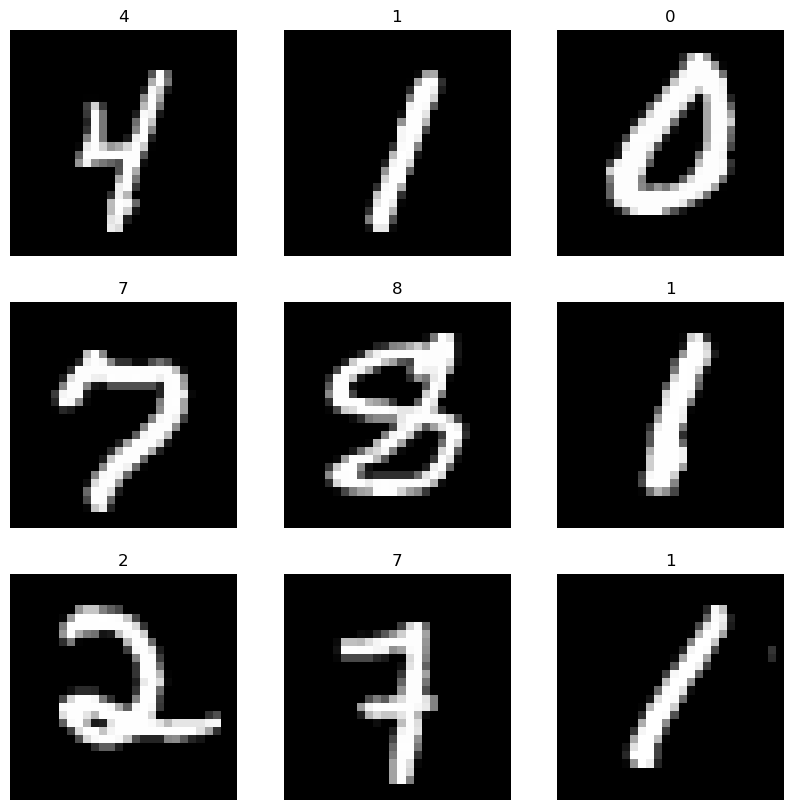

In [5]:
plt.figure(figsize=(10, 10))
for i, (image, label) in enumerate(ds_train.take(9)):
    plt.subplot(3, 3, i+1)
    plt.imshow(image.numpy().reshape(28, 28), cmap='gray')
    plt.title(label.numpy())
    plt.axis('off')
plt.show()

In [6]:
#normalizing images
def normalize(image, label):
    image = tf.cast(image, tf.float32) / 255.
    return image, label

ds_train = ds_train.map(normalize)
ds_test = ds_test.map(normalize)

In [7]:
#model
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

C:\Users\Nikhil_Chamle\anaconda3\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [8]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

In [9]:
history = model.fit(
    ds_train.batch(32),
    epochs=5,
    validation_data=ds_test.batch(32)
)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8542 - loss: 0.4929 - val_accuracy: 0.9598 - val_loss: 0.1383
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9554 - loss: 0.1517 - val_accuracy: 0.9700 - val_loss: 0.1071
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9674 - loss: 0.1084 - val_accuracy: 0.9739 - val_loss: 0.0903
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9724 - loss: 0.0899 - val_accuracy: 0.9747 - val_loss: 0.0810
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9770 - loss: 0.0762 - val_accuracy: 0.9774 - val_loss: 0.0768


In [10]:
test_loss, test_acc = model.evaluate(ds_test.batch(32))
print(f'Test accuracy: {test_acc:.2f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9769 - loss: 0.0751
Test accuracy: 0.98


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


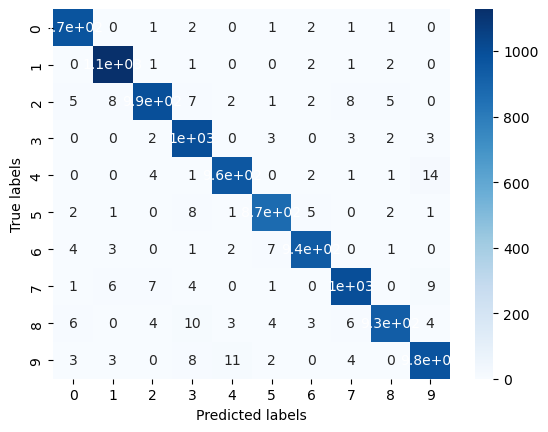

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


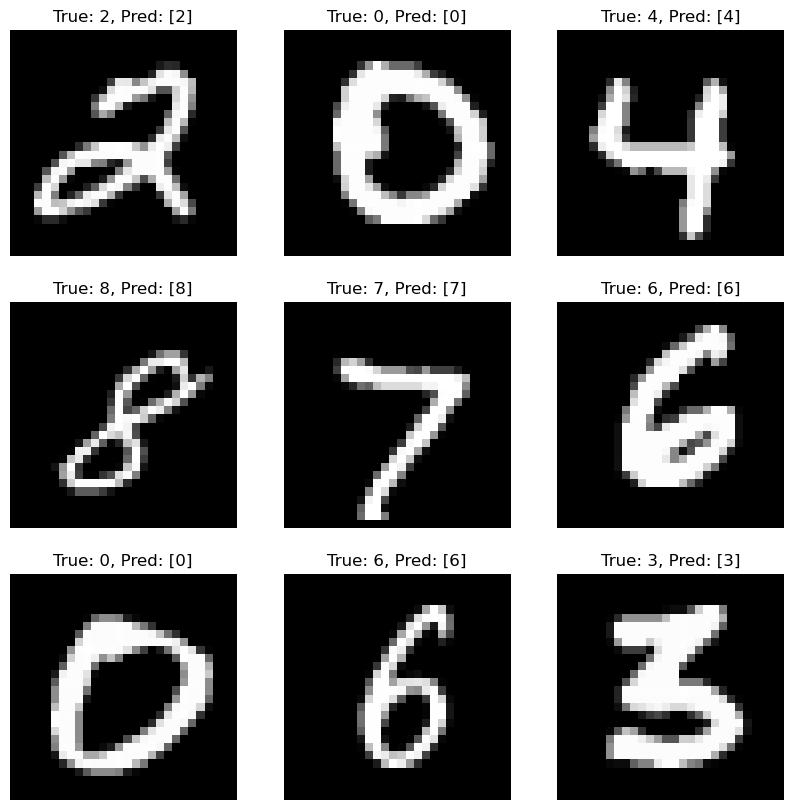

In [11]:
# Confusion matrix
test_labels = [label.numpy() for image, label in ds_test]
test_preds = model.predict(ds_test.batch(32))
test_preds = tf.argmax(test_preds, axis=1).numpy()
sns.heatmap(tf.math.confusion_matrix(test_labels, test_preds), annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

# Example predictions
plt.figure(figsize=(10, 10))
for i, (image, label) in enumerate(ds_test.take(9)):
    plt.subplot(3, 3, i+1)
    plt.imshow(image.numpy().reshape(28, 28), cmap='gray')
    plt.title(f'True: {label.numpy()}, Pred: {tf.argmax(model.predict(image[None, ...]), axis=1).numpy()}')
    plt.axis('off')
plt.show()

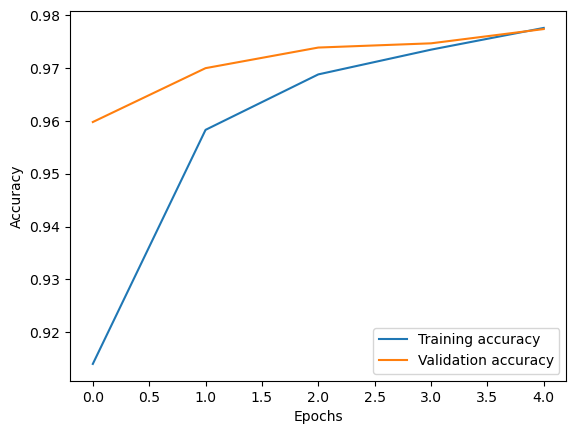

In [12]:
#accuracy curves
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()